# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [12]:
import pandas as pd
import numpy as np

#load the dataset
file_path = 'data/vehicles.csv'
vehicles_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
vehicles_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


Many rows have missing value for several features. 
We will need to clean up data

In [13]:
# Check for missing values
missing_values = vehicles_df.isnull().mean() * 100

# Remove duplicates
vehicles_df = vehicles_df.drop_duplicates()

# Display the percentage of missing values for each column
missing_values


id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Columns with significants percentages of missing values are: 
condition: 40.8%
cylinders: 41.6%
VIN: 37.7%
drive: 30.6%
size: 71.8%
type: 21.8%
paint_color: 30.5%

In [14]:
# Drop the 'size' column
vehicles_df = vehicles_df.drop(columns=['size'])

# Impute missing values for numerical columns with median
vehicles_df['year'].fillna(vehicles_df['year'].median(), inplace=True)
vehicles_df['odometer'].fillna(vehicles_df['odometer'].median(), inplace=True)

# Impute missing values for categorical columns with mode
vehicles_df['manufacturer'].fillna(vehicles_df['manufacturer'].mode()[0], inplace=True)
vehicles_df['model'].fillna(vehicles_df['model'].mode()[0], inplace=True)
vehicles_df['fuel'].fillna(vehicles_df['fuel'].mode()[0], inplace=True)
vehicles_df['title_status'].fillna(vehicles_df['title_status'].mode()[0], inplace=True)
vehicles_df['transmission'].fillna(vehicles_df['transmission'].mode()[0], inplace=True)

# Check the remaining missing values
remaining_missing_values = vehicles_df.isnull().sum()

remaining_missing_values


id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition       174104
cylinders       177678
fuel                 0
odometer             0
title_status         0
transmission         0
VIN             161042
drive           130567
type             92858
paint_color     130203
state                0
dtype: int64

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [15]:
# we still have missing values, we are going to further clean data
# VIN has unique value will not be necessary in this analysis 

# Drop the 'VIN' column
vehicles_df = vehicles_df.drop(columns=['VIN'])

# Impute missing values for categorical columns with mode
vehicles_df['condition'].fillna(vehicles_df['condition'].mode()[0], inplace=True)
vehicles_df['cylinders'].fillna(vehicles_df['cylinders'].mode()[0], inplace=True)
vehicles_df['drive'].fillna(vehicles_df['drive'].mode()[0], inplace=True)
vehicles_df['type'].fillna(vehicles_df['type'].mode()[0], inplace=True)
vehicles_df['paint_color'].fillna(vehicles_df['paint_color'].mode()[0], inplace=True)

# Check the remaining missing values
final_missing_values = vehicles_df.isnull().sum()

final_missing_values


id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [17]:
# Generate summary statistics for numerical columns
summary_statistics = vehicles_df.describe()

summary_statistics

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,426880.000000,4.268800e+05
mean,7.311487e+09,7.519903e+04,2011.240173,9.791454e+04
std,4.473170e+06,1.218228e+07,9.439234,2.127801e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.813000e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.330000e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


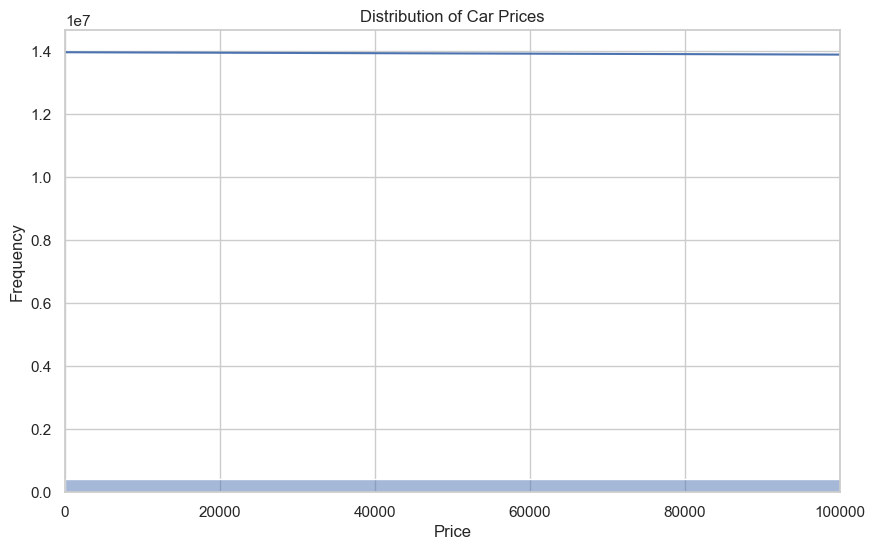

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(vehicles_df['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 100000)  # Limit the x-axis to focus on most common prices
plt.show()


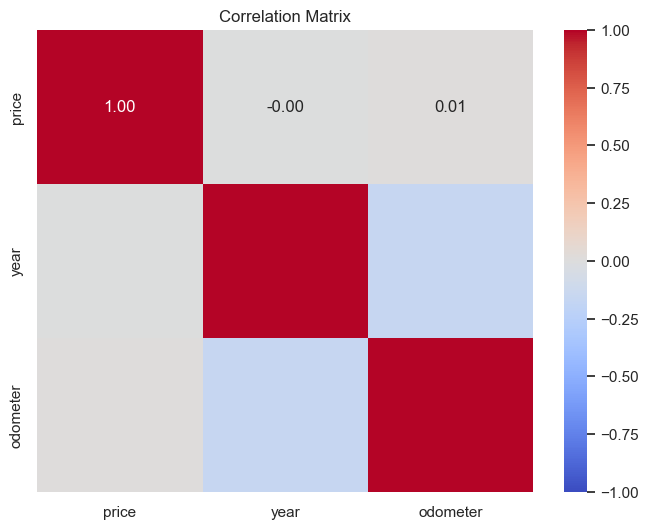

In [19]:
# Calculate the correlation matrix
correlation_matrix = vehicles_df[['price', 'year', 'odometer']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define the features and target variable
features = ['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 
            'title_status', 'transmission', 'drive', 'type', 'paint_color']
target = 'price'

X = vehicles_df[features]
y = vehicles_df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing steps for numerical and categorical features
numerical_features = ['year', 'odometer']
categorical_features = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 
                        'transmission', 'drive', 'type', 'paint_color']

# Preprocessing pipelines for both numerical and categorical data
numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mae, r2)


(169043.56163757978, -0.04671143219958651)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Model performance
 MAE - 169043.56163757978
 R2 - -0.04671143219958651

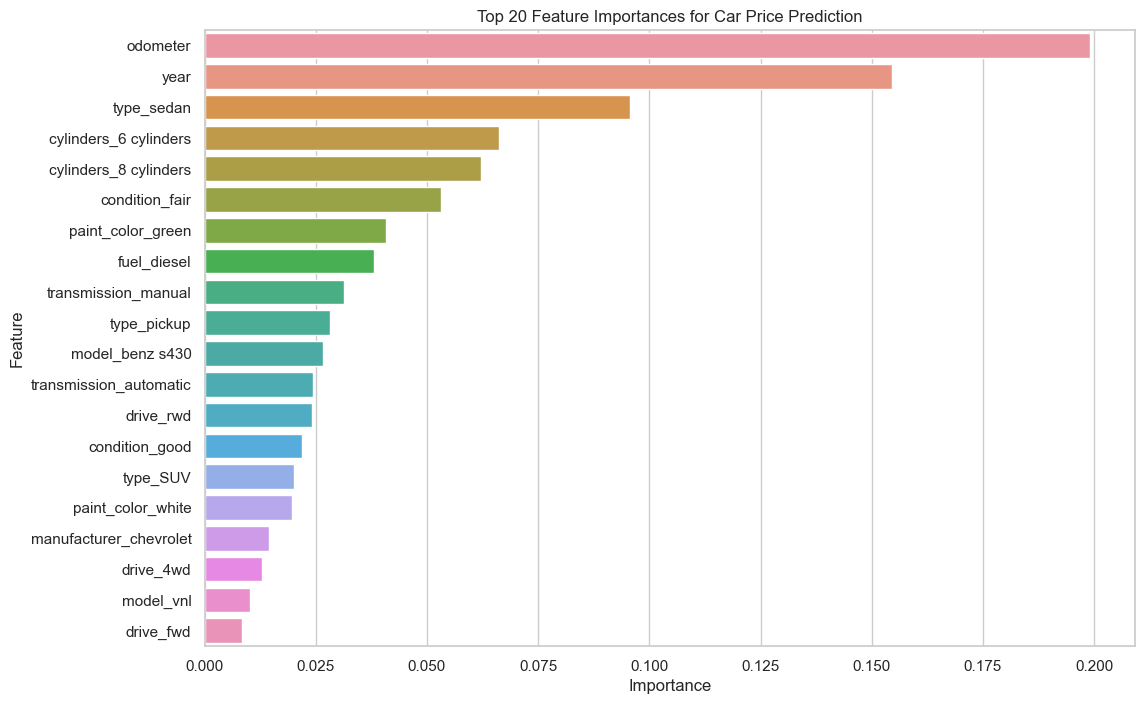

In [22]:
# Extract feature importances from the Random Forest model
importances = model.feature_importances_

# Get the feature names from the preprocessor
feature_names = (numerical_features + 
                 list(pipeline.named_steps['preprocessor'].named_transformers_['cat']
                      .named_steps['onehot'].get_feature_names_out(categorical_features)))

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)


# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(20))
plt.title('Top 20 Feature Importances for Car Price Prediction')
plt.show()


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Key drivers of the car price

1. Odometer 
2. Year 
3. Type of Sedan 
4. Transmission Type 
5. Drive Type 
5. Benz s430


### Recommendation for used car dealership 

Prioritize stocking newer cars with lower mileage, good condition, and popular models from reputable manufacturers.